In [ ]:
# %%

" ai for source separation of percussions in urban sounds"

' ai for source separation of percussions in urban sounds'

In [ ]:
# %%

import random
import pandas as pd
from config import *
# from model import *
from dataset import *
from train import train
from utils import *
from torch.utils.data import DataLoader
from torch import optim
from Last_model import *
from metrics_loss import *

# We have 7358 sounds of differents classes (dog bark, drilling, jackhammer, siren, children_playing, engine idling, air conditioner, car horn) with a duration of maximum 4 seconds some are shorter
# 387 files of the percussions class that we want to separate from the others or "hear" better

n_fft = 256
hop_length = n_fft // 4

Epoch 1/5, Average validation Loss: 0.0626: 100%|██████████| 49/49 [00:03<00:00, 14.35it/s]


Epoch 1/5, Training Loss: 0.0918, Validation Loss: 0.0626, Time: 156.29s


Epoch 2/5, Average validation Loss: 0.0533: 100%|██████████| 49/49 [00:02<00:00, 16.69it/s]


Epoch 2/5, Training Loss: 0.0622, Validation Loss: 0.0533, Time: 104.86s


Epoch 3/5, Average validation Loss: 0.0282: 100%|██████████| 49/49 [00:03<00:00, 13.51it/s]


Epoch 3/5, Training Loss: 0.0399, Validation Loss: 0.0282, Time: 155.74s


Epoch 4/5, Average validation Loss: 0.0197: 100%|██████████| 49/49 [00:24<00:00,  2.04it/s]


Epoch 4/5, Training Loss: 0.0246, Validation Loss: 0.0197, Time: 204.42s


Epoch 5/5, Average validation Loss: 0.0158: 100%|██████████| 49/49 [00:20<00:00,  2.35it/s]

Epoch 5/5, Training Loss: 0.0185, Validation Loss: 0.0158, Time: 182.35s


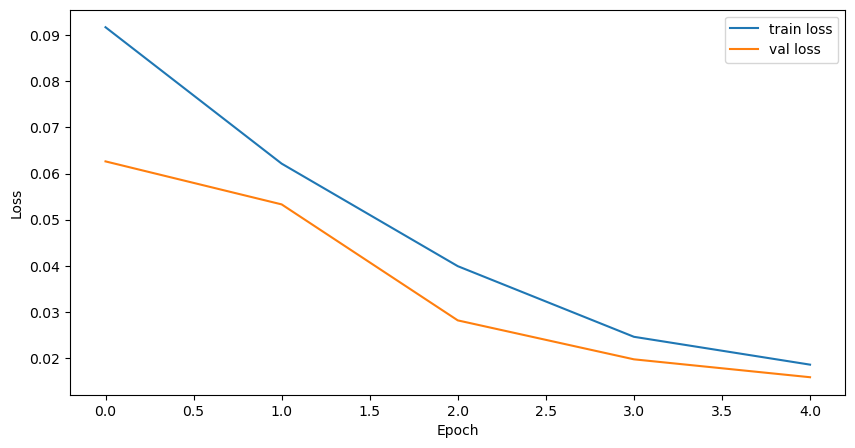

In [ ]:
# %%

# Load metadata
metadata = pd.read_csv(os.path.join(
    DATASET_MIX_AUDIO_PATH, "metadata.csv"))

# define the train, validation and test sets

dataset = MixtureDataset(metadata_file=metadata, k=0.8,
                         noise_class='engine_idling')
# Split the dataset into training, validation and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# Define the model, optimizer and loss function
model = ResUNet(in_c=3, out_c=32).to("cuda")
# optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-6, amsgrad=True)
optimizer = optim.SGD(model.parameters(), lr=0.001,
                      momentum=0.9)
criterion = loss_wav
# Train the model
train_losses, val_losses, SDRi_list, SISDR_list = train(model, train_loader, val_loader,
                                                        num_epochs=5, optimizer=optimizer, criterion=criterion, device="cuda")

# Plot the training and validation losses
plot_loss(train_losses, val_losses)